# Mike Osberg Final Project: Part 2
- Create an exploratory data analysis notebook.
- Perform statistical analysis, along with any visualizations.
- Determine how to handle sampling or missing values.
- Clearly identify shortcomings, assumptions, and next steps.


## Load Data

In [2]:
#Import stats/EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
from pathlib import Path

#Import viz libraries
import pandas as pd
import seaborn as sns


In [3]:
#List of the variables from the DHS file that I want to load
dhs_variables = ["v005","v012","v023","v024","v025", "v106", "v107", "v130", "v119", "v120", "v121", 
                 "v153", "v113", "v115", "v123", "v124", "v125", "v190", "v137", "v201", "h44a_1", "h46a_1", "m15_1", "m73_1"]

In [4]:
#load the data from the namibia DHS dataset
data = Path('Datasets','NMIR61FL.DTA')
nmb_dhs = pd.read_stata(data, columns = dhs_variables)

#create a dataset that focuses on only the values of women ages 15-49. the survey notes suggest that there were 842 women who were added (over the ages of 50) in half of the households survyed. 
nmb_dhs = nmb_dhs.loc[nmb_dhs.loc[:,"v012"]<50,:]

In [5]:
#create a survey weight variable. For DHS, you have to take the survey weight variable and divide it by 1,000,000
#svy_weight = nmb_dhs.loc[:,"v005"]/1000000

#create a weighted dataframe using the weightstats module
#nmb_dhs_weighted = DescrStatsW(nmb_dhs.h44a_1, weights=svy_weight)

## Missing Variables
- How many missing values do I have for each of my variables?
    - If it is a lot, I may need to reconsider each of the variables, I'm going to use. Or decide to impute the values. 
- Make sure to report what I've done with my missing values

In [6]:
#number of missing values
nmb_dhs.isnull().sum()

v005         0
v012         0
v023         0
v024         0
v025         0
v106         0
v107       554
v130        22
v119         0
v120         1
v121         2
v153         7
v113        11
v115        28
v123        11
v124        13
v125        10
v190         0
v137         0
v201         0
h44a_1    8689
h46a_1    8285
m15_1     5208
m73_1     7110
dtype: int64

In [7]:
#number of non-missing values
#number of missing values
nmb_dhs.notnull().sum()

v005      9176
v012      9176
v023      9176
v024      9176
v025      9176
v106      9176
v107      8622
v130      9154
v119      9176
v120      9175
v121      9174
v153      9169
v113      9165
v115      9148
v123      9165
v124      9163
v125      9166
v190      9176
v137      9176
v201      9176
h44a_1     487
h46a_1     891
m15_1     3968
m73_1     2066
dtype: int64

There are quite a few missing variables in the care seeking variables (h44a and h46a). I am going to need to reduce my dataset down to only those records where there is a response to the care seeking question. This may bias my sample, so it would probably be good to analyze the people who didn't respond to care seeking and compare them to those who responded to care seeking to see if there is a significant difference between them. 

## Data Exploration



**Education and Care-Seeking**

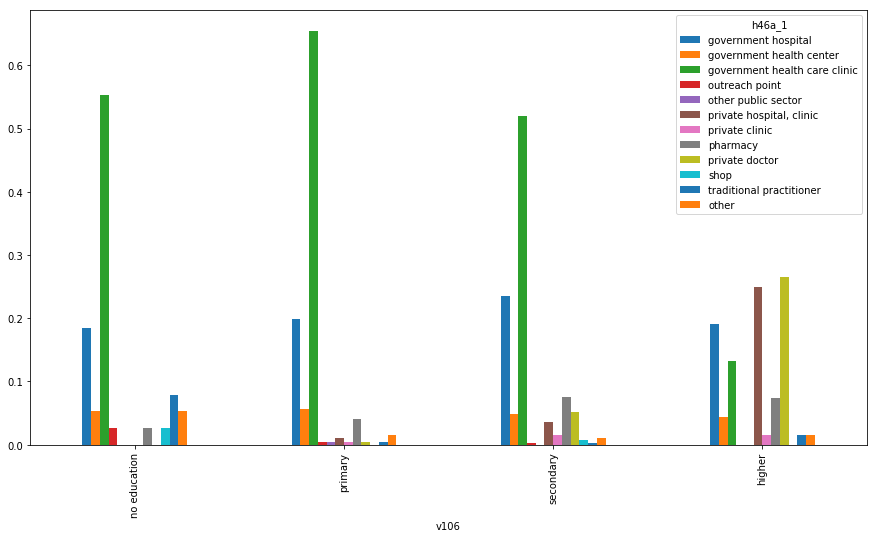

In [8]:
#Cross-tab and plot of education level and care seeking. Normalized for each education level (e.g. each education level adds up to 100%)
h46_v106 = pd.crosstab(nmb_dhs.loc[:,'v106'],nmb_dhs.loc[:,'h46a_1'],normalize = 'index').round(3)
care_edu_normal = h46_v106.plot(kind = 'bar', figsize=(15,8))

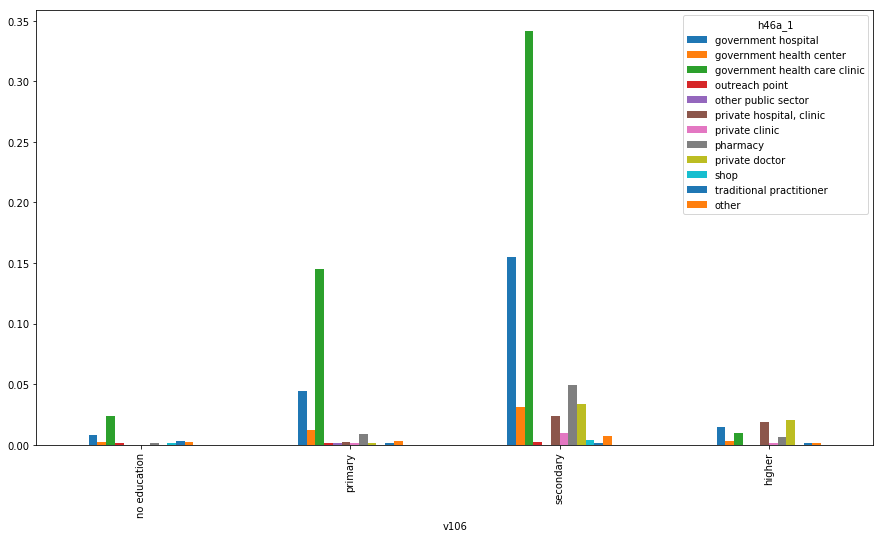

In [9]:
#Non-Normalized
#Cross-tab and plot of education level and care seeking. Normalized for each education level (e.g. each education level adds up to 100%)
v106_h46 = pd.crosstab(nmb_dhs.loc[:,'v106'],nmb_dhs.loc[:,"h46a_1"],normalize = True).round(3)
care_edu_all = v106_h46.plot(kind = "bar",figsize=(15,8))

**Wealth and Care Seeking**

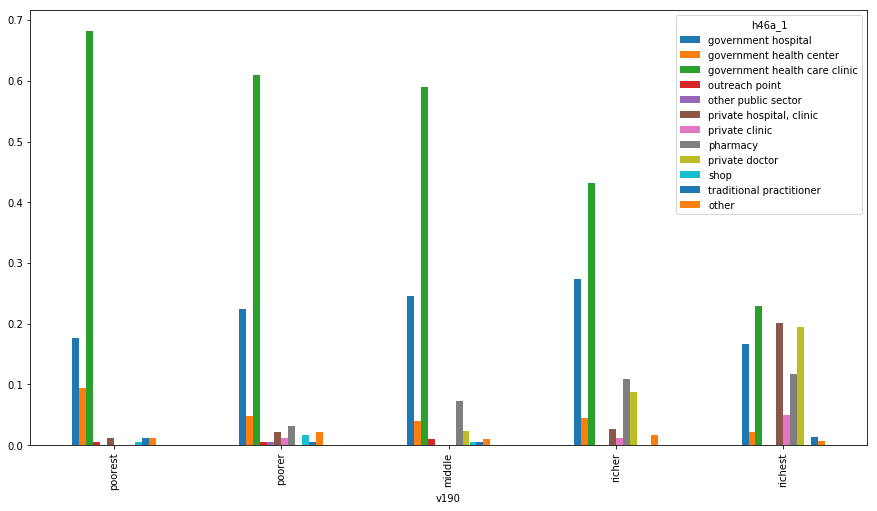

In [10]:
#Normalized
#Cross-tab and plot of wealth level and care seeking. Normalized for each wealth level (e.g. each wealth level adds up to 100%)
h46_v190 = pd.crosstab(nmb_dhs.loc[:,'v190'],nmb_dhs.loc[:,'h46a_1'],normalize = 'index').round(3)
care_wealth_normal = h46_v190.plot(kind = 'bar', figsize=(15,8))

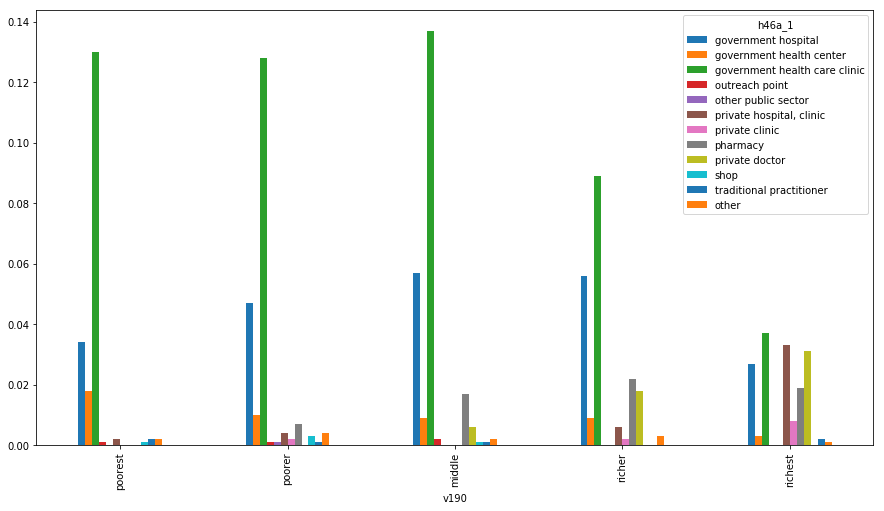

In [11]:
#Non-Normalized
#Cross-tab and plot of wealth level and care seeking.
v190_h46 = pd.crosstab(nmb_dhs.loc[:,'v190'],nmb_dhs.loc[:,"h46a_1"],normalize = True).round(3)
care_wealth_all = v190_h46.plot(kind = "bar",figsize=(15,8))

**Care-Seeking and Region**

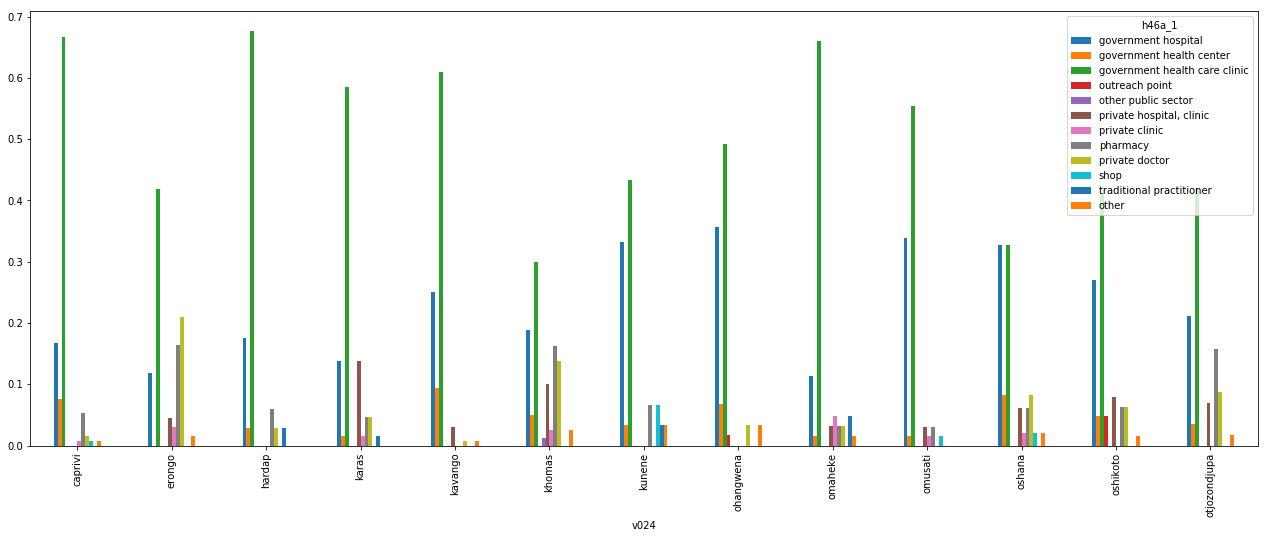

In [12]:
#Normalized
#Cross-tab and plot of region level and care seeking. Normalized for each region (e.g. each region adds up to 100%)
h46_v024 = pd.crosstab(nmb_dhs.loc[:,'v024'],nmb_dhs.loc[:,'h46a_1'],normalize = 'index').round(3)
care_region_normal = h46_v024.plot(kind = 'bar', figsize=(22,8))

**Care Seeking and Urban/Rural**

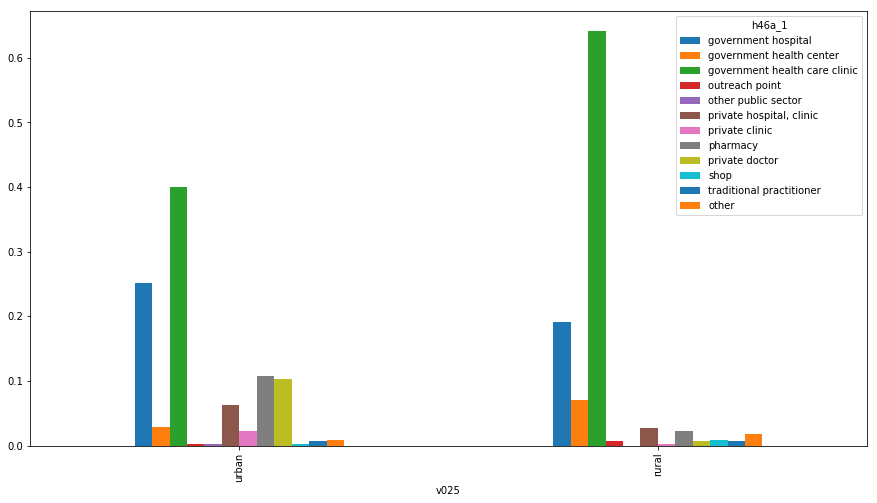

In [13]:
#Normalized
#Cross-tab and plot of urban/rural and care seeking. Normalized for urban and rural level (e.g. each adds up to 100%)
h46_v025 = pd.crosstab(nmb_dhs.loc[:,'v025'],nmb_dhs.loc[:,'h46a_1'],normalize = 'index').round(3)
care_urb_rur_normal = h46_v025.plot(kind = 'bar', figsize=(15,8))

**Care Seeking and Religion**

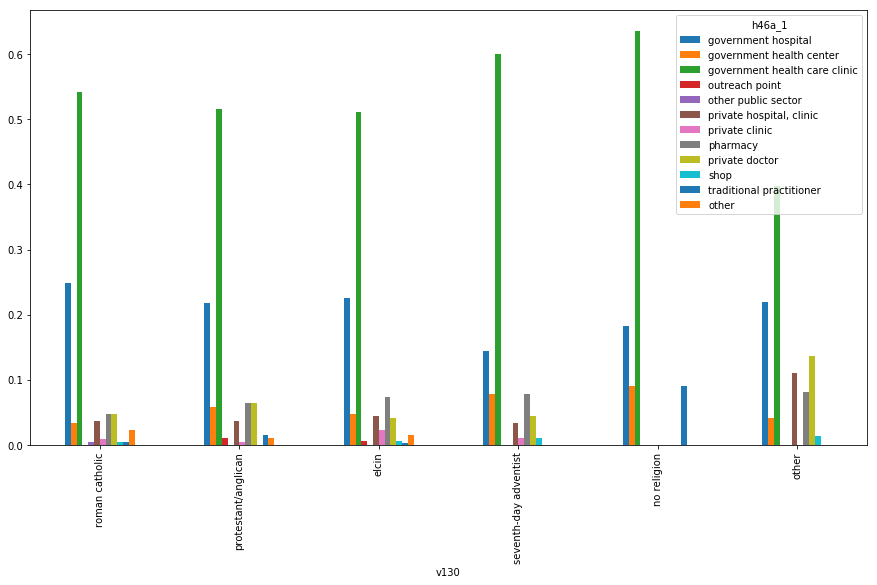

In [14]:
#Normalized
#Cross-tab and plot of religion and care seeking. Normalized for each religion (e.g. each religion adds up to 100%)
h46_v130 = pd.crosstab(nmb_dhs.loc[:,'v130'],nmb_dhs.loc[:,'h46a_1'],normalize = 'index').round(3)
care_religion_normal = h46_v130.plot(kind = 'bar', figsize=(15,8))

### Preliminary Modeling Attempts

In [100]:
#Need to reload the dat without the categorical labels, otherwise the KNN algorithm gives us an error
data = Path('Datasets','NMIR61FL.DTA')
nmb_dhs_no_labels = pd.read_stata(data, columns = dhs_variables, convert_categoricals = False)

#create a dataset that focuses on only the values of women ages 15-49. the survey notes suggest that there were 842 women who were added (over the ages of 50) in half of the households survyed. 
nmb_dhs_no_labels = nmb_dhs_no_labels.loc[nmb_dhs_no_labels.loc[:,"v012"]<50,:]

In [101]:
nmb_dhs_diarrhea = nmb_dhs_no_labels.loc[nmb_dhs.loc[:,"h46a_1"].notnull(),:]

In [102]:
nmb_dhs_diarrhea.loc[:,"v190"].value_counts()

3    207
2    187
4    183
1    170
5    144
Name: v190, dtype: int64

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [115]:
feature_cols = ['v106','v190']
X = nmb_dhs_diarrhea.loc[:,feature_cols]
y = nmb_dhs_diarrhea.loc[:,'h46a_1']

In [116]:
# 1. Split X and y into training and testing sets (using `random_state` for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [117]:
# 2. Train the estimator on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [118]:
# 3. Test the estimator on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.484304932735426

In [119]:
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value

In [109]:
# # then compare predicting the mean every time to the true values
# /scrub/
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.5207631874298541

Well, there seems to be something going wrong here, so I'll need to work on this more before I get into the more detailed modeling process. My model is somehow doing worse than the null model in a KNN model. Will need to explore further. 